# Correlation Plot and Trends

In [1]:
%cd CSV_file_from_2007_to_2017

/Users/Seychelles/Desktop/GoogleTensorflow/Data_Collector/CSV_file_from_2007_to_2017


In [50]:
import pandas as pd # import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
pollution_PM = pd.read_csv("SkopjeRegion_PM10_airpointers.csv") #load data set
pollution_PM=pollution_PM.rename(columns = {'DATE_TIME;LAT;LON;PM10;NAME':'pm10'})#rename
df_n = pd.DataFrame(pollution_PM.pm10.str.split(';',4).tolist(),columns = ['date','Lat','Lon','PM10','NAME'])

In [5]:
df_n.shape # Test Shape

(626500, 5)

In [124]:
df_n[1:2]

,date,Lat,Lon,PM10,NAME
1,26.01.2007 10,42.003600,21.463600,,Gazi Baba


In [14]:
#df_m.sort_values(by='date',ascending=True)[0:1000]

In [7]:
df_n['PM10']= pd.to_numeric(df_n['PM10']) # Convert PM_10 column to Numeric Values

In [8]:
df_n['PM10'].replace('NaN', np.NaN)[1:3] #replace NAn with zero np.nan

1      NaN
2    61.67
Name: PM10, dtype: float64

In [9]:
df_n.head()

,date,Lat,Lon,PM10,NAME
0,26.01.2007 10,41.992500,21.423611,NaN,Centar
1,26.01.2007 10,42.003600,21.463600,NaN,Gazi Baba
2,26.01.2007 10,42.006667,21.386944,61.67,Karpos
3,26.01.2007 10,41.977821,21.464474,NaN,Lisice
4,26.01.2007 10,41.999200,21.440800,95.57,Rektorat


In [ ]:
df_n.date= pd.to_datetime(df_n.date)  # CONVER TO DATE TIME 

In [ ]:
df_n.drop(['Lat','Lon','NAME'], axis = 1, inplace = True, errors = 'ignore')


## SAVE FILE FOR REUSE

In [11]:
df_n.to_csv("test.csv"); # Save file for reuse 

In [6]:
df_n = pd.read_csv("test.csv") #load data set saved from previous ops


In [235]:
df_n.head() # 

,Unnamed: 0,date,Lat,Lon,PM10,NAME
0,0,2007-01-26 10:00:00,41.992500,21.423611,NaN,Centar
1,1,2007-01-26 10:00:00,42.003600,21.463600,NaN,Gazi Baba
2,2,2007-01-26 10:00:00,42.006667,21.386944,61.67,Karpos
3,3,2007-01-26 10:00:00,41.977821,21.464474,NaN,Lisice
4,4,2007-01-26 10:00:00,41.999200,21.440800,95.57,Rektorat


### Delete Uncorrelated Data portion

In [7]:
df_n.drop(['Lat','Lon','NAME','Unnamed: 0'], axis = 1, inplace = True, errors = 'ignore')
# drop non useful columns

In [8]:
df_n.date= pd.to_datetime(df_n.date)  # Convert to dat time

In [9]:
df_n.sort_values(by='date',ascending=True,inplace=True) # sort data sets

In [10]:
df_n[1:2]

,date,PM10
9408,2007-01-02,NaN


In [11]:
df_n.set_index('date',inplace=True); # set index as date 

In [241]:
df_n.head()

,PM10
date,
2007-01-02,NaN
2007-01-02,NaN
2007-01-02,NaN
2007-01-02,204.92
2007-01-02,NaN


In [242]:
df_n.dtypes

PM10    float64
dtype: object

In [243]:
del df_n.index.name  # delete index name

In [45]:
#We can drop index as in here. Uncomment *# code.
# *uncorrelated_index_collector=df_n['2007'][25000:37000].index
# *uncorrelated_index_collector[uncorrelated_index_collector.size-1]
# use line above to get last number of index of the list
# *df_n = df_n.drop(df_n["2007-05-22 20:00:00":"2007-08-02 06:00:00"].index) #drop
#df_n = df_n.drop(df_n['2007'][25000:37000].index) # drop index 

# Correlation Plot

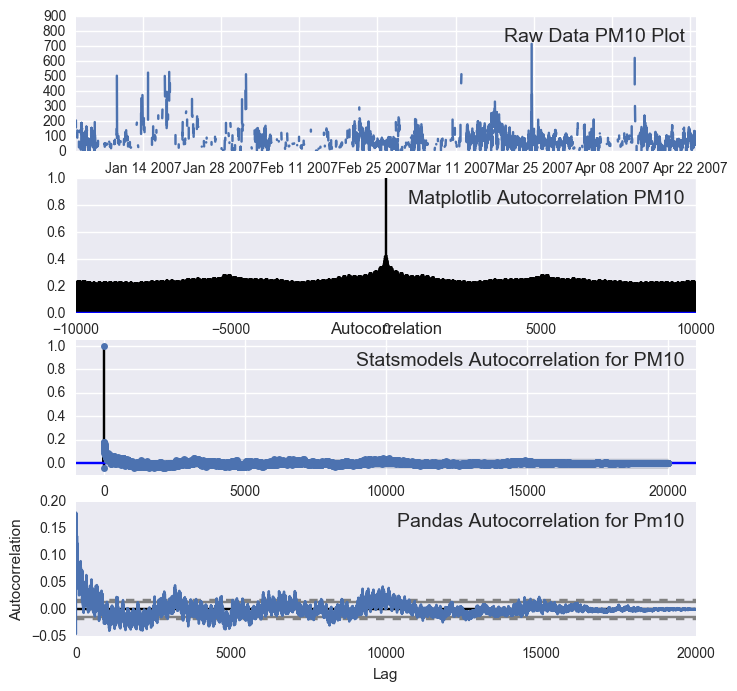

In [272]:
from pandas.tools.plotting import autocorrelation_plot

from statsmodels.graphics import tsaplots
fig, axes = plt.subplots(nrows=4, figsize=(8, 8))
def label(ax, string):
    ax.annotate(string, (1, 1), xytext=(-8, -8), ha='right', va='top',
                size=14, xycoords='axes fraction', textcoords='offset points')
    
axes[0].plot(df_n.PM10[1:20000])
label(axes[0],'Raw Data PM10 Plot')

axes[1].acorr(df_n.PM10[1:200000].fillna(0), maxlags=df_n.PM10[1:10000].size-30)
label(axes[1], 'Matplotlib Autocorrelation PM10')
print('\n')

tsaplots.plot_acf(df_n.PM10[1:20000].fillna(0), axes[2])
label(axes[2], 'Statsmodels Autocorrelation for PM10')

pd.tools.plotting.autocorrelation_plot(df_n.PM10[1:20000].fillna(0), ax=axes[3])
label(axes[3], 'Pandas Autocorrelation for Pm10')


plt.show()

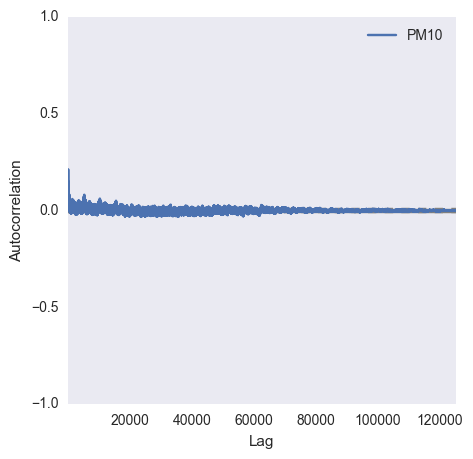

In [47]:
# Change index of frame to see 2007 to get some autocorrelation
from pandas.tools.plotting import autocorrelation_plot

fig = plt.figure()
fig.set_figwidth(5)
fig.set_figheight(5)

_ = autocorrelation_plot(df_n['2007':'2008'].fillna(0), label='PM10')
_ = plt.legend(loc='upper right')

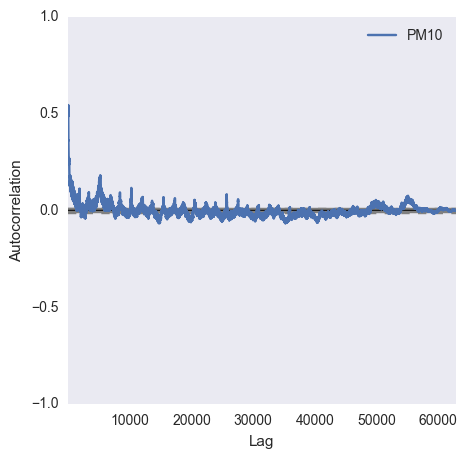

In [48]:
# Change index of frame to see 2007 to get some autocorrelation
from pandas.tools.plotting import autocorrelation_plot

fig = plt.figure()
fig.set_figwidth(5)
fig.set_figheight(5)

_ = autocorrelation_plot(df_n['2016':'2017'].fillna(0), label='PM10')
_ = plt.legend(loc='upper right')

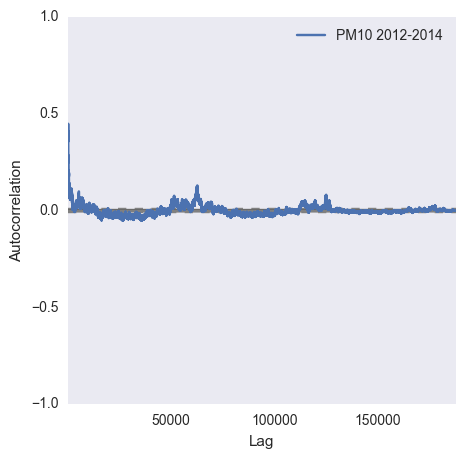

In [49]:
# Change index of frame to see 2007 to get some autocorrelation
from pandas.tools.plotting import autocorrelation_plot

fig = plt.figure()
fig.set_figwidth(5)
fig.set_figheight(5)

_ = autocorrelation_plot(df_n['2012':'2014'].fillna(0), label='PM10 2012-2014')
_ = plt.legend(loc='upper right')

# ROLLING MEAN PLOTS AND TRENDS

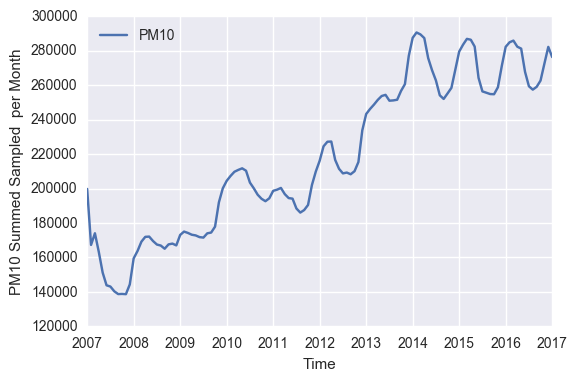

In [257]:
df_n.resample("1M").sum().rolling(window=30, min_periods=1).mean().plot()
plt.xlabel('Time')
plt.ylabel('PM10 Summed Sampled  per Month')

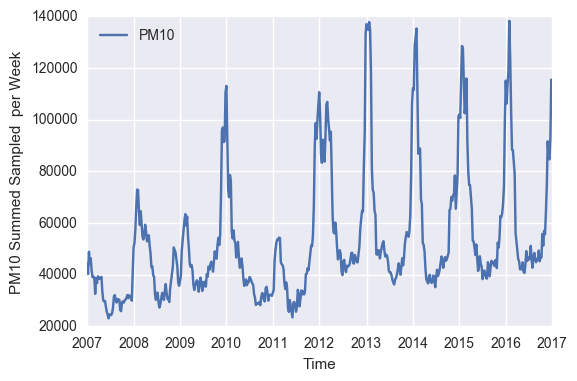

In [260]:
df_n.resample("1W").sum().rolling(window=7, min_periods=1).mean().plot()
plt.xlabel('Time')
plt.ylabel('PM10 Summed Sampled  per Week')

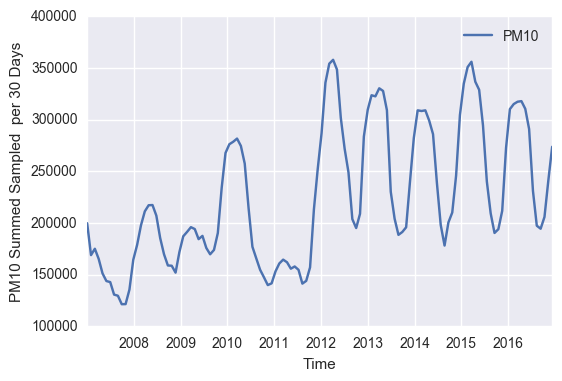

In [261]:
df_n.resample("30D").sum().rolling(window=7, min_periods=1).mean().plot()
plt.xlabel('Time')
plt.ylabel('PM10 Summed Sampled  per 30 Days')

In [13]:
import statsmodels.api as sm  
from statsmodels.tsa.seasonal import seasonal_decompose
PM10_data_ = df_n['2012'].copy(deep=True) 
#PM10_data_.replace([np.inf, -np.inf], np.nan,inplace=True);
PM10_data_=PM10_data_.fillna(0)


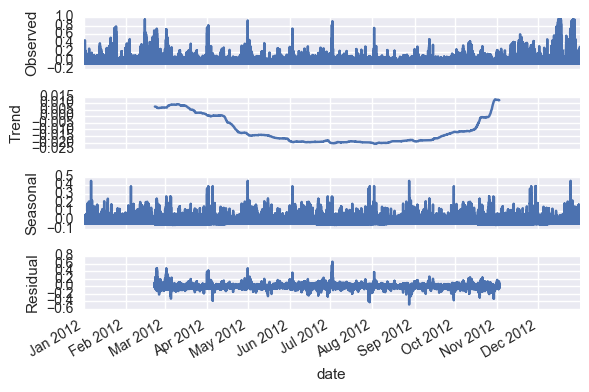

In [53]:
import warnings
warnings.simplefilter(action = "ignore")
PM10_data_.PM10.interpolate(inplace=True)  
result = sm.tsa.seasonal_decompose(PM10_data_,freq=20000)  
fig = plt.figure()  
fig = result.plot() 